In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as col
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import missingno as msno
import openpyxl

In [2]:
componentes = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
componentes.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [3]:
componentes['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [15]:
#Ind}formación del syp

start = dt.datetime(2000,1,1)
end = dt.datetime.now()   

sp500_data = yf.download('^GSPC', start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [12]:
sp500m = sp500_data.resample('M').apply(lambda x: x.iloc[-1,])

In [14]:

sp500y = sp500_data.resample('Y').apply(lambda x: x.iloc[-1,])
sp500y_var = np.log1p(sp500y.pct_change())

El desempeño de cada sectores se puede observar con ayuda de los ETFs que contienen un portafolio con grupo de acciones ponderados por capitalización bursatil.

Los ETFs se encuentran en el link https://www.etf.com/sections/etf-strategist-corner/sector-sector-sp-500

In [5]:
etfs = ['XLI','XLV','XLK',
        'XLC','XLP',
        'XLY','XLU','XLF','XLB',
        'XLRE','XLE']

etf_sect = pd.DataFrame({'Sector':componentes['GICS Sector'].unique(),
                          'ETF': etfs})
etf_sect

,Sector,ETF
0,Industrials,XLI
1,Health Care,XLV
2,Information Technology,XLK
3,Communication Services,XLC
4,Consumer Staples,XLP
5,Consumer Discretionary,XLY
6,Utilities,XLU
7,Financials,XLF
8,Materials,XLB
9,Real Estate,XLRE


In [6]:

sectores = yf.download(list(etf_sect.ETF.values),start = '2000-01-01')['Adj Close']
sectores
#print(((dfs

[*********************100%***********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2000-01-03,15.332283,NaN,14.677697,11.641028,18.901960,42.116325,13.171587,NaN,12.086847,21.487972,22.854637
2000-01-04,15.184676,NaN,14.401413,11.132134,18.379757,39.979652,12.800691,NaN,11.722252,21.000349,22.167101
2000-01-05,15.811991,NaN,14.781305,11.044666,18.297825,39.386131,13.026844,NaN,12.018054,20.811958,21.894461
2000-01-06,16.217892,NaN,15.351150,11.529706,18.543575,38.080395,13.271099,NaN,11.997421,20.878454,22.143402
2000-01-07,16.208664,NaN,15.515190,11.720545,19.250099,38.745121,14.112423,NaN,12.100615,21.133339,23.186543
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,76.279999,55.459999,78.680000,31.219999,96.790001,143.250000,72.029999,34.830002,64.360001,125.800003,142.190002
2023-03-23,76.190002,56.360001,77.589996,31.010000,96.510002,145.580002,71.750000,34.619999,63.700001,125.559998,142.039993
2023-03-24,76.809998,56.650002,77.889999,30.990000,96.910004,145.960007,72.970001,35.509998,65.690002,127.300003,141.580002


In [7]:
sectores = sectores.resample('M').apply(lambda x: x.iloc[-1,])

In [16]:
sectores['SP500'] = sp500m[start:end]

In [17]:
sectores_rent = np.log1p(sectores.pct_change())

In [18]:
comparacion = etf_sect.copy()
comparacion = comparacion.append({'Sector':'SP500','ETF':'SPY'},ignore_index=True)
# Para ver mejor la información, anualizamos la rentabilidad usando la formula de matematicas financieras ((1+i)^t)-1
comparacion['Rentabilidad'] = ((1+sectores_rent.mean().values)**12)-1 
#Igual para la volatilidad con la formula sigma*raiz(t)
comparacion['Volatilidad'] = sectores_rent.std().values*np.sqrt(12)
comparacion['Sharpe'] = comparacion.Rentabilidad/comparacion.Volatilidad
comparacion.sort_values(['Sharpe'],ascending=False)

<ipython-input-18-fa7b09c11dee>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparacion = comparacion.append({'Sector':'SP500','ETF':'SPY'},ignore_index=True)


,Sector,ETF,Rentabilidad,Volatilidad,Sharpe
6,Utilities,XLU,0.075862,0.123513,0.614205
9,Real Estate,XLRE,0.079615,0.143205,0.555951
8,Materials,XLB,0.075445,0.153887,0.490260
10,Energy,XLE,0.086250,0.191532,0.450315
4,Consumer Staples,XLP,0.076166,0.190803,0.399186
0,Industrials,XLI,0.077226,0.207751,0.371726
7,Financials,XLF,0.053871,0.176512,0.305197
11,SP500,SPY,0.046111,0.155815,0.295932
2,Information Technology,XLK,0.074802,0.259530,0.288221
5,Consumer Discretionary,XLY,0.058378,0.232835,0.250726


In [20]:
gics = list(comparacion.sort_values(['Sharpe'],ascending=False)['Sector'].values)
gics

['Utilities',
 'Real Estate',
 'Materials',
 'Energy',
 'Consumer Staples',
 'Industrials',
 'Financials',
 'SP500',
 'Information Technology',
 'Consumer Discretionary',
 'Communication Services',
 'Health Care']

In [21]:
universo = componentes[componentes['GICS Sector'].isin(gics)][['Symbol','GICS Sector']]
universo.groupby(['GICS Sector']).count()

,Symbol
GICS Sector,
Communication Services,24
Consumer Discretionary,53
Consumer Staples,37
Energy,23
Financials,73
Health Care,65
Industrials,73
Information Technology,66
Materials,29


In [22]:

universo.shape

(503, 2)

In [37]:
universo_data = yf.download(list(universo.Symbol.values),start,end)['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [38]:
universo.shape

(503, 2)

In [39]:
universo_data = universo_data.resample('M').apply(lambda x: x.iloc[-1,])
universo_rent = np.log1p(universo_data.pct_change())

Supuestamente este serían las 10 acciones que se usarian para el armado del portfolio segun Markowitz

In [42]:
#crear tabla symbol,rentabilidad,volatilidad,sharpe
acciones = pd.DataFrame({'Symbol':universo_data.columns,
                        'Rentabilidad':((1+universo_rent.mean().values)**12)-1,
                        'Volatilidad':universo_rent.std().values*np.sqrt(12)})

acciones['Sharpe'] = acciones.Rentabilidad/acciones.Volatilidad
acciones.sort_values(['Sharpe'],ascending=False).head(10)

,Symbol,Rentabilidad,Volatilidad,Sharpe
200,GEHC,1.870304,0.282215,6.627233
89,CEG,0.480923,0.371281,1.295308
78,CARR,0.384560,0.303363,1.267656
47,AVGO,0.323173,0.278046,1.162299
87,CDW,0.273675,0.236420,1.157581
290,MA,0.298651,0.291706,1.023808
432,TDG,0.273979,0.290305,0.943763
335,NOW,0.300878,0.322211,0.933793
123,CTVA,0.236221,0.255503,0.924533
348,ODFL,0.280221,0.316979,0.884037


Este portfolio que se va usar fue el que arrojó el EDA de la computadora que se crasheo, el cual es muy distinto al que arroja este notebook debido a que no recuerdo exactamente el código.El portfolio es el siguiente: 

portfolio = ['AZO', 'TSCO', 'NEE', 'AES', 'CTVA', 'LIN', 'EXR', 'MAA', 'HES', 'COP']

In [25]:
portfolio = ['AZO', 'TSCO', 'NEE', 'AES', 'CTVA', 'LIN', 'EXR', 'MAA', 'HES', 'COP']

[*********************100%***********************]  10 of 10 completed


<Axes: xlabel='Date'>

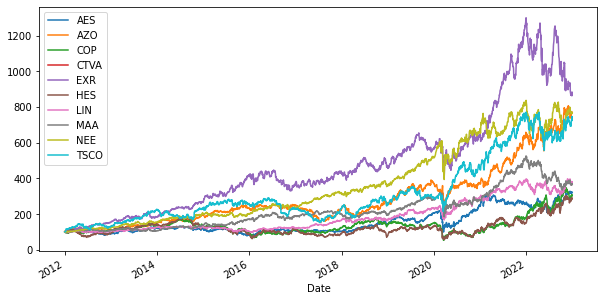

In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the portfolio
portfolio = ['AZO', 'TSCO', 'NEE', 'AES', 'CTVA', 'LIN', 'EXR', 'MAA', 'HES', 'COP']

# Tomo aproximadamente los 10 últimos años ya que me interesa su performance actual, en
#realación a la histórica
start_date = '2012-01-01'
end_date = '2023-01-01'

# Download the stock prices
prices = yf.download(portfolio, start=start_date, end=end_date)['Adj Close']

#Observamos la variación logarítmica de los precios

(prices / prices.iloc[0]*100).plot(figsize=(10,5))


In [24]:
prices.head()

,AES,AZO,COP,CTVA,EXR,HES,LIN,MAA,NEE,TSCO
Date,,,,,,,,,,
2012-01-03,8.876380,319.790009,38.147369,NaN,16.681232,49.100517,86.009087,42.142471,10.851006,30.264202
2012-01-04,8.810465,326.959991,37.967365,NaN,16.407776,49.604969,86.918266,41.573708,10.823395,30.224989
2012-01-05,9.022855,333.850006,37.663914,NaN,16.674402,48.427898,86.056946,42.196011,10.961448,30.246780
2012-01-06,8.956938,338.040009,37.370731,NaN,16.681232,47.435783,86.096848,41.981884,10.845484,30.373127
2012-01-09,9.132712,339.500000,37.514748,NaN,16.606035,47.839367,85.267395,41.025013,10.858369,30.760923


In [8]:
#Calculamos los retornos
log_returns = np.log(prices / prices.shift(1)).dropna()

In [10]:
# Observamos la media de los retornos y los anualizamos debido a que aproximadamente hay 252 ruedas de cotización anualmente

log_returns.mean() * 252

AES     0.182471
AZO     0.236402
COP     0.225524
CTVA    0.210028
EXR     0.122172
HES     0.258126
LIN     0.169896
MAA     0.114860
NEE     0.159735
TSCO    0.235368
dtype: float64

In [11]:
#Ahora observamos la covarianza

log_returns.cov() * 252

,AES,AZO,COP,CTVA,EXR,HES,LIN,MAA,NEE,TSCO
AES,0.162313,0.051349,0.104590,0.074653,0.048543,0.104383,0.065498,0.066575,0.066380,0.048942
AZO,0.051349,0.095531,0.046275,0.045670,0.037021,0.041745,0.042840,0.050158,0.043862,0.047166
COP,0.104590,0.046275,0.249955,0.090475,0.034681,0.236267,0.065939,0.052896,0.042165,0.043392
CTVA,0.074653,0.045670,0.090475,0.141767,0.040836,0.100146,0.056636,0.053130,0.038919,0.041266
EXR,0.048543,0.037021,0.034681,0.040836,0.096886,0.038269,0.037514,0.068361,0.051484,0.033310
HES,0.104383,0.041745,0.236267,0.100146,0.038269,0.314816,0.068350,0.056064,0.034791,0.047272
LIN,0.065498,0.042840,0.065939,0.056636,0.037514,0.068350,0.081588,0.048057,0.047113,0.037159
MAA,0.066575,0.050158,0.052896,0.053130,0.068361,0.056064,0.048057,0.095149,0.056758,0.034136
NEE,0.066380,0.043862,0.042165,0.038919,0.051484,0.034791,0.047113,0.056758,0.091695,0.037466
TSCO,0.048942,0.047166,0.043392,0.041266,0.033310,0.047272,0.037159,0.034136,0.037466,0.106903


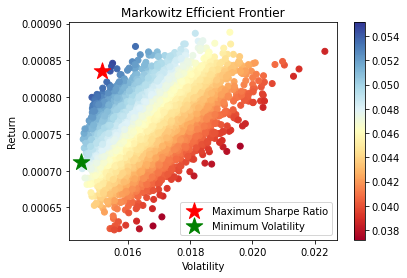

In [38]:
#Ahora procedemos con el armado de la frontera de eficiencia

# Calculate the mean returns and covariance matrix
mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()

# Set the number of portfolios to simulate
num_portfolios = 10000

# Initialize arrays to store the results
results = np.zeros((3 + len(portfolio), num_portfolios))
weights = []

# Empezamos a simular portfolios con una seed de 10000
for i in range(num_portfolios):
    # Generate random weights for the portfolio
    w = np.random.uniform(size=len(portfolio))
    w /= np.sum(w)
    weights.append(w)
    
    # Calculate the portfolio return and volatility
    portfolio_return = np.sum(mean_returns * w)
    portfolio_volatility = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    
    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility
    for j in range(len(portfolio)):
        results[j + 3, i] = w[j]

results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe'] + portfolio)

# Aqui intentamos encontrar maximizar el sharpe, uno de nuestros objetivos
max_sharpe = results_df.loc[results_df['Sharpe'].idxmax()]

# Aqui intentamos minimizar la volatilidad, el otro de nuestros objetivos
min_volatility = results_df.loc[results_df['Volatility'].idxmin()]


plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe'], cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Markowitz Efficient Frontier')
plt.colorbar()
plt.scatter(max_sharpe['Volatility'], max_sharpe['Return'], marker='*', s=300, c='r', label='Maximum Sharpe Ratio')
plt.scatter(min_volatility['Volatility'], min_volatility['Return'], marker='*', s=300, c='g', label='Minimum Volatility')
plt.legend()
plt.show()

Honestamente faltó el portfolio de mercado, ya que falta la capital market line la cual denota cual es el portfolio adecuado en la frontera de Markowitz. Aclaración los portfolios más eficientes son aquellos que están más a la izquierda(menos volatilidad) y más arriba(más rentabiidad).
Generalemte al simular portfolios se genera una especie de figura de paraguas. El portfolio que había obtenido en la computadora que se rompe estaba maximizado a través del método de interpolacion de splines.